# Машинное обучение

План :
* Предварительная обработка данных
* Линейная регрессия
    * Lasso - regression
    * Ridge - regression
* Случайный лес
* Градиентный бустинг

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore', category=UserWarning)


## `Предварительная обработка данных`

### 1. Работа с пропусками


In [2]:
df = pd.read_csv('data_without_miss.csv')

X = df.iloc[:,:-2]
y = df['Цена']

In [3]:
X.isnull().sum()

Округ                       0
Ближайшая станция метро    10
Время до метро              0
Метро рядом                 0
Застройщик                 94
ЖК                         17
Класс                      94
Тип квартиры                0
Этаж                        0
Этажей в доме               0
Отделка                     0
Количество комнат           0
Площадь квартиры            0
Жилая площадь               0
Площадь кухни               0
Тип дома                   94
Парковка                   94
Год сдачи                   0
dtype: int64

В пункте с EDA пропуски в категориальных признаках мы хаменяли пустыми строками, сейчас они опять рассматриваются как пропуски, поэтому давайте снова заполним их пустыми строками

In [4]:
categorical_features = X.dtypes[X.dtypes == "object"].index

X[categorical_features] = X[categorical_features].fillna('')

In [5]:
X.isnull().sum()

Округ                      0
Ближайшая станция метро    0
Время до метро             0
Метро рядом                0
Застройщик                 0
ЖК                         0
Класс                      0
Тип квартиры               0
Этаж                       0
Этажей в доме              0
Отделка                    0
Количество комнат          0
Площадь квартиры           0
Жилая площадь              0
Площадь кухни              0
Тип дома                   0
Парковка                   0
Год сдачи                  0
dtype: int64

Среди признаков есть не особо информативные, например, ЖК, в котором находится квартира, так как влияние этого признака легко заменить классом этого ЖК, что намного сильнее влияет на целевую переменную

In [6]:
X = X.drop(columns = 'ЖК')

In [7]:
X.head()

Округ Ближайшая станция метро  Время до метро  Метро рядом  \
0  СВАО            Марьина роща            17.0            2   
1  СЗАО             Трикотажная             4.0            3   
2   САО           Тимирязевская             3.0            3   
3   ЗАО                    Фили             5.0            3   
4   САО             Белорусская             4.0            3   

         Застройщик    Класс Тип квартиры  Этаж  Этажей в доме       Отделка  \
0   Компания Пионер  Премиум     квартира   5.0           22.0   Без отделки   
1       СК Резиденс   Бизнес     квартира   2.0           26.0    Неизвестно   
2          MR Group  Премиум     квартира   2.0           36.0      Чистовая   
3  Аеон Девелопмент  Премиум     квартира   2.0           45.0   Без отделки   
4          MR Group  Премиум  апартаменты   2.0           16.0  Предчистовая   

   Количество комнат  Площадь квартиры  Жилая площадь  Площадь кухни  \
0                1.0             32.20      20.333629      11.724697   
1                1.0             48.06      20.333629      11.724697   
2                1.0             37.62      12.800000       3.100000   
3                1.0             42.80      20.333629      11.724697   
4                1.0             47.90      20.333629      11.724697   

              Тип дома             Парковка  Год сдачи  
0           Монолитный            Подземная     2025.0  
1  Монолитно-кирпичный  Подземная, гостевая     2023.0  
2           Монолитный  Подземная, гостевая     2025.0  
3  Монолитно-кирпичный            Подземная     2026.0  
4  Монолитно-кирпичный  Подземная, гостевая     2023.0

### 2. Работа с категориальными признаками

In [8]:
X_dum = pd.get_dummies(X, drop_first=True)
X_dum.head()

Время до метро  Метро рядом  Этаж  Этажей в доме  Количество комнат  \
0            17.0            2   5.0           22.0                1.0   
1             4.0            3   2.0           26.0                1.0   
2             3.0            3   2.0           36.0                1.0   
3             5.0            3   2.0           45.0                1.0   
4             4.0            3   2.0           16.0                1.0   

   Площадь квартиры  Жилая площадь  Площадь кухни  Год сдачи  Округ_ЗАО  ...  \
0             32.20      20.333629      11.724697     2025.0          0  ...   
1             48.06      20.333629      11.724697     2023.0          0  ...   
2             37.62      12.800000       3.100000     2025.0          0  ...   
3             42.80      20.333629      11.724697     2026.0          1  ...   
4             47.90      20.333629      11.724697     2023.0          0  ...   

   Тип дома_Панельный, кирпичный  Тип дома_Панельный, монолитный  Парковка_-  \
0                              0                               0           0   
1                              0                               0           0   
2                              0                               0           0   
3                              0                               0           0   
4                              0                               0           0   

   Парковка_Гостевая  Парковка_Отдельная многоуровневая  \
0                  0                                  0   
1                  0                                  0   
2                  0                                  0   
3                  0                                  0   
4                  0                                  0   

   Парковка_Отдельная многоуровневая, гостевая  Парковка_Подземная  \
0                                            0                   1   
1                                            0                   0   
2                                            0                   0   
3                                            0                   1   
4                                            0                   0   

   Парковка_Подземная, гостевая  Парковка_Подземная, отдельная многоуровневая  \
0                             0                                             0   
1                             1                                             0   
2                             1                                             0   
3                             0                                             0   
4                             1                                             0   

   Парковка_Подземная, отдельная многоуровневая, гостевая  
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

[5 rows x 232 columns]

### 3. Разделим на тестовую и тренировочную выборки

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size = 0.25, random_state=42)

### 4. Масштабирование признаков

Воспользуемся наиболее популярным методом - `MinMaxScaler`

In [10]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

### 5. Подготовка визуализаций

Для построения графиков отсортируем таргеты по возрастанию и сделаем маску, которая будет распологать в соответсвие таргетам предсказания

In [11]:
sort_mask_train = np.argsort(y_train.to_numpy())
sort_mask_test = np.argsort(y_test.to_numpy())

## `Линейная регрессия`
### 1. Lasso - регрессия

Посмотрим, насколько увеличилось количество признаков после кодирования:

In [12]:
print(f'Количество признаков до кодирования: {X.shape[1]}')
print(f'Количество признаков после кодирования: {X_dum.shape[1]}')

Количество признаков до кодирования: 17
Количество признаков после кодирования: 232


Количество признаков после кодирования увеличилось больше, чем в 10 раз, что очень плохо скажется на качестве модели и скорее всего приведет к ее переобучению. Попроубем побороть эту проблему с помощью __$L_1$ - регуляризации__, у которой есть очень полезное для нас свйство - зануление наименее важных признаков

In [13]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


model = Lasso().fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)
y_train_pred = model.predict(X_train_norm)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))
print("Train R_2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R_2 = %.4f" % r2_score(y_test, y_pred))

Test MSE = 6638165933860.5869
Train MSE = 2156934832686.1594
Train R_2 = 0.9656
Test R_2 = 0.9111


Посмотрим сколько коэффициентов занулилось

In [14]:
np.sum(model.coef_==0)

4

`Во - первых`, ошибка на тесте намного выше, чем на на тренировочных данных, что свидетельствует о переобучении, `во - вторых`
, всего 4 коэффициент равны нулю
Давайте попробуем улучшить качество, подобрав коэффициент регуляризации с помощью `GridSearchCV`

In [15]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(0, 50, 100)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(X_train, y_train)

best_alpha_lasso = searcher.best_params_["alpha"]

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.439e+14, tolerance: 4.578e+12
  model = cd_fast.enet_coordinate_descent(
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.385e+14, tolerance: 4.697e+12
  model = cd_fast.enet_coordinate_descent(
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.339e+14, tolerance: 4.578e+12
  model = cd_fast.enet_coordinate_descent(
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.467e+14, tolerance: 4.560e+12
  model = cd_fast.enet_coordinate_descent(
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.744e+13, tolerance: 4.651e+12
  model = cd_fast.enet_coordinate_descent(
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.596e+13, tolerance: 4.735e+12
  model = cd_fast.enet_coordinate_descent(
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Выведем наилучший коэффициент регуляризации:

In [16]:
best_alpha_lasso

3430.4692863149194

In [17]:
model = Lasso(alpha = best_alpha_lasso).fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)
y_train_pred = model.predict(X_train_norm)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))
print("Train R_2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R_2 = %.4f" % r2_score(y_test, y_pred))

Test MSE = 5954499098376.4932
Train MSE = 2753215441929.9116
Train R_2 = 0.9562
Test R_2 = 0.9203


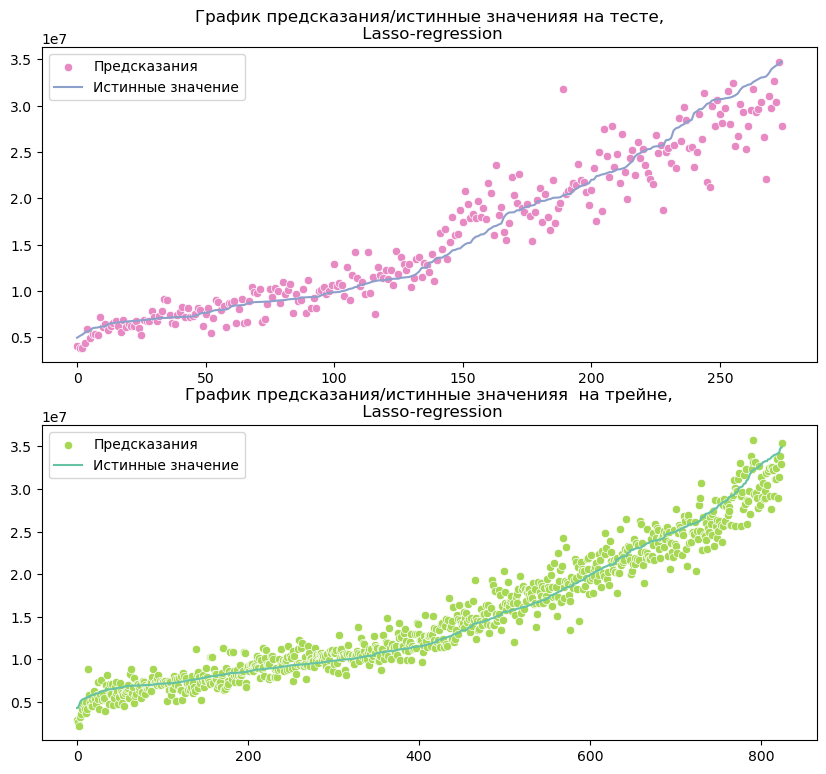

In [18]:
colors = sns.color_palette('Set2', 5)

plt.figure(figsize = (10,9))

plt.subplot(2,1,1)
plt.title('График предсказания/истинные значенияя на тесте,\n Lasso-regression')
sns.scatterplot(x = range(len(y_pred)), y = y_pred[sort_mask_test], color = colors[3], label = 'Предсказания')
sns.lineplot(x = range(len(y_test)), y = y_test.to_numpy()[sort_mask_test], 
             color = colors[2], label = 'Истинные значение')

plt.subplot(2,1,2)
plt.title('График предсказания/истинные значенияя  на трейне,\n Lasso-regression')
sns.scatterplot(x = range(len(y_train_pred)), y = y_train_pred[sort_mask_train], color = colors[4], label = 'Предсказания')
sns.lineplot(x = range(len(y_train)), y = y_train.to_numpy()[sort_mask_train], color = colors[0], label = 'Истинные значение')

plt.legend()
plt.show()

После подбора параметра `alpha` R2 на тесте увеличилось, а на ттрейне уменьшилось, что говорит об уменьшении уровня переобучения и росте качества нашей модели. Таким образом линейная модель вряд ли может считаться подходящей моделью для наших данных

### Ridge - регрессия

In [19]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-2, 50, 100)
searcher_ridge = GridSearchCV(Ridge(), [{"alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher_ridge.fit(X_train_norm, y_train)

best_alpha_ridge = searcher_ridge.best_params_["alpha"]

In [20]:
best_alpha_ridge

0.37649358067924693

In [21]:
model_ridge = Ridge(alpha = best_alpha_ridge).fit(X_train_norm, y_train)

y_pred = model_ridge.predict(X_test_norm)
y_train_pred = model_ridge.predict(X_train_norm)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))
print("Train R_2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R_2 = %.4f" % r2_score(y_test, y_pred))

Test MSE = 6154773753360.2129
Train MSE = 2371079655151.8071
Train R_2 = 0.9622
Test R_2 = 0.9176


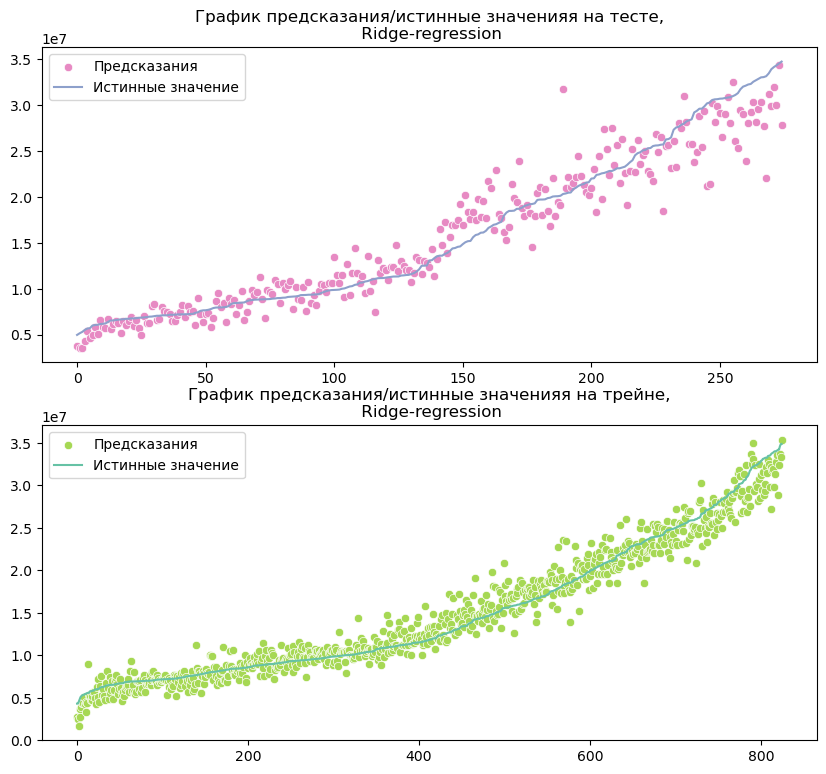

In [22]:
colors = sns.color_palette('Set2', 5)

plt.figure(figsize = (10,9))

plt.subplot(2,1,1)
plt.title('График предсказания/истинные значенияя на тесте,\n Ridge-regression')
sns.scatterplot(x = range(len(y_pred)), y = y_pred[sort_mask_test], color = colors[3], label = 'Предсказания')
sns.lineplot(x = range(len(y_test)), y = y_test.to_numpy()[sort_mask_test], 
             color = colors[2], label = 'Истинные значение')

plt.subplot(2,1,2)
plt.title('График предсказания/истинные значенияя на трейне,\n Ridge-regression')
sns.scatterplot(x = range(len(y_train_pred)), y = y_train_pred[sort_mask_train], color = colors[4], label = 'Предсказания')
sns.lineplot(x = range(len(y_train)), y = y_train.to_numpy()[sort_mask_train], color = colors[0], label = 'Истинные значение')


plt.legend()
plt.show()

## `Случайный лес`

In [24]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = np.arange(10, 120, 5)
max_depth = np.arange(2, 10, 2)
min_samples_leaf = np.arange( 2, 10,2)
searcher_rf = GridSearchCV(RandomForestRegressor(), {'n_estimators':n_estimators,
                                                     'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf},
                        scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1, verbose =10)
searcher_rf.fit(X_train_norm, y_train)



Fitting 5 folds for each of 352 candidates, totalling 1760 fits
[CV 3/5; 2/352] START max_depth=2, min_samples_leaf=2, n_estimators=15..........
[CV 3/5; 2/352] END max_depth=2, min_samples_leaf=2, n_estimators=15;, score=-4205469.979 total time=   0.1s
[CV 1/5; 4/352] START max_depth=2, min_samples_leaf=2, n_estimators=25..........
[CV 1/5; 4/352] END max_depth=2, min_samples_leaf=2, n_estimators=25;, score=-4656912.383 total time=   0.2s
[CV 1/5; 7/352] START max_depth=2, min_samples_leaf=2, n_estimators=40..........
[CV 1/5; 7/352] END max_depth=2, min_samples_leaf=2, n_estimators=40;, score=-4543519.664 total time=   0.2s
[CV 2/5; 7/352] START max_depth=2, min_samples_leaf=2, n_estimators=40..........
[CV 2/5; 7/352] END max_depth=2, min_samples_leaf=2, n_estimators=40;, score=-4355234.152 total time=   0.2s
[CV 2/5; 10/352] START max_depth=2, min_samples_leaf=2, n_estimators=55.........
[CV 2/5; 10/352] END max_depth=2, min_samples_leaf=2, n_estimators=55;, score=-4312326.101 tota

[CV 4/5; 1/352] START max_depth=2, min_samples_leaf=2, n_estimators=10..........
[CV 4/5; 1/352] END max_depth=2, min_samples_leaf=2, n_estimators=10;, score=-3859640.774 total time=   0.0s
[CV 2/5; 3/352] START max_depth=2, min_samples_leaf=2, n_estimators=20..........
[CV 2/5; 3/352] END max_depth=2, min_samples_leaf=2, n_estimators=20;, score=-4338550.189 total time=   0.1s
[CV 3/5; 5/352] START max_depth=2, min_samples_leaf=2, n_estimators=30..........
[CV 3/5; 5/352] END max_depth=2, min_samples_leaf=2, n_estimators=30;, score=-3975719.954 total time=   0.2s
[CV 4/5; 5/352] START max_depth=2, min_samples_leaf=2, n_estimators=30..........
[CV 4/5; 5/352] END max_depth=2, min_samples_leaf=2, n_estimators=30;, score=-3709030.062 total time=   0.1s
[CV 4/5; 8/352] START max_depth=2, min_samples_leaf=2, n_estimators=45..........
[CV 4/5; 8/352] END max_depth=2, min_samples_leaf=2, n_estimators=45;, score=-3616097.461 total time=   0.2s
[CV 5/5; 8/352] START max_depth=2, min_samples_lea

[CV 2/5; 1/352] START max_depth=2, min_samples_leaf=2, n_estimators=10..........
[CV 2/5; 1/352] END max_depth=2, min_samples_leaf=2, n_estimators=10;, score=-4264317.434 total time=   0.0s
[CV 5/5; 2/352] START max_depth=2, min_samples_leaf=2, n_estimators=15..........
[CV 5/5; 2/352] END max_depth=2, min_samples_leaf=2, n_estimators=15;, score=-5189346.282 total time=   0.1s
[CV 4/5; 4/352] START max_depth=2, min_samples_leaf=2, n_estimators=25..........
[CV 4/5; 4/352] END max_depth=2, min_samples_leaf=2, n_estimators=25;, score=-3686924.234 total time=   0.2s
[CV 5/5; 4/352] START max_depth=2, min_samples_leaf=2, n_estimators=25..........
[CV 5/5; 4/352] END max_depth=2, min_samples_leaf=2, n_estimators=25;, score=-5198956.790 total time=   0.1s
[CV 3/5; 7/352] START max_depth=2, min_samples_leaf=2, n_estimators=40..........
[CV 3/5; 7/352] END max_depth=2, min_samples_leaf=2, n_estimators=40;, score=-4090666.298 total time=   0.2s
[CV 4/5; 7/352] START max_depth=2, min_samples_lea

[CV 2/5; 2/352] START max_depth=2, min_samples_leaf=2, n_estimators=15..........
[CV 2/5; 2/352] END max_depth=2, min_samples_leaf=2, n_estimators=15;, score=-4324965.227 total time=   0.1s
[CV 5/5; 3/352] START max_depth=2, min_samples_leaf=2, n_estimators=20..........
[CV 5/5; 3/352] END max_depth=2, min_samples_leaf=2, n_estimators=20;, score=-5256322.924 total time=   0.1s
[CV 4/5; 6/352] START max_depth=2, min_samples_leaf=2, n_estimators=35..........
[CV 4/5; 6/352] END max_depth=2, min_samples_leaf=2, n_estimators=35;, score=-3593495.839 total time=   0.2s
[CV 5/5; 6/352] START max_depth=2, min_samples_leaf=2, n_estimators=35..........
[CV 5/5; 6/352] END max_depth=2, min_samples_leaf=2, n_estimators=35;, score=-5108511.943 total time=   0.2s
[CV 3/5; 9/352] START max_depth=2, min_samples_leaf=2, n_estimators=50..........
[CV 3/5; 9/352] END max_depth=2, min_samples_leaf=2, n_estimators=50;, score=-3966648.574 total time=   0.2s
[CV 4/5; 9/352] START max_depth=2, min_samples_lea

[CV 5/5; 1/352] START max_depth=2, min_samples_leaf=2, n_estimators=10..........
[CV 5/5; 1/352] END max_depth=2, min_samples_leaf=2, n_estimators=10;, score=-5171226.581 total time=   0.0s
[CV 3/5; 3/352] START max_depth=2, min_samples_leaf=2, n_estimators=20..........
[CV 3/5; 3/352] END max_depth=2, min_samples_leaf=2, n_estimators=20;, score=-3975947.653 total time=   0.1s
[CV 5/5; 5/352] START max_depth=2, min_samples_leaf=2, n_estimators=30..........
[CV 5/5; 5/352] END max_depth=2, min_samples_leaf=2, n_estimators=30;, score=-5137029.706 total time=   0.2s
[CV 1/5; 6/352] START max_depth=2, min_samples_leaf=2, n_estimators=35..........
[CV 1/5; 6/352] END max_depth=2, min_samples_leaf=2, n_estimators=35;, score=-4591250.847 total time=   0.2s
[CV 1/5; 9/352] START max_depth=2, min_samples_leaf=2, n_estimators=50..........
[CV 1/5; 9/352] END max_depth=2, min_samples_leaf=2, n_estimators=50;, score=-4578745.362 total time=   0.2s
[CV 2/5; 9/352] START max_depth=2, min_samples_lea

[CV 1/5; 2/352] START max_depth=2, min_samples_leaf=2, n_estimators=15..........
[CV 1/5; 2/352] END max_depth=2, min_samples_leaf=2, n_estimators=15;, score=-4475152.072 total time=   0.1s
[CV 4/5; 3/352] START max_depth=2, min_samples_leaf=2, n_estimators=20..........
[CV 4/5; 3/352] END max_depth=2, min_samples_leaf=2, n_estimators=20;, score=-3613885.682 total time=   0.1s
[CV 2/5; 6/352] START max_depth=2, min_samples_leaf=2, n_estimators=35..........
[CV 2/5; 6/352] END max_depth=2, min_samples_leaf=2, n_estimators=35;, score=-4331986.474 total time=   0.2s
[CV 3/5; 6/352] START max_depth=2, min_samples_leaf=2, n_estimators=35..........
[CV 3/5; 6/352] END max_depth=2, min_samples_leaf=2, n_estimators=35;, score=-4070562.081 total time=   0.2s
[CV 5/5; 9/352] START max_depth=2, min_samples_leaf=2, n_estimators=50..........
[CV 5/5; 9/352] END max_depth=2, min_samples_leaf=2, n_estimators=50;, score=-5135306.482 total time=   0.2s
[CV 1/5; 10/352] START max_depth=2, min_samples_le

[CV 1/5; 1/352] START max_depth=2, min_samples_leaf=2, n_estimators=10..........
[CV 1/5; 1/352] END max_depth=2, min_samples_leaf=2, n_estimators=10;, score=-4462077.554 total time=   0.0s
[CV 4/5; 2/352] START max_depth=2, min_samples_leaf=2, n_estimators=15..........
[CV 4/5; 2/352] END max_depth=2, min_samples_leaf=2, n_estimators=15;, score=-3770926.503 total time=   0.1s
[CV 2/5; 4/352] START max_depth=2, min_samples_leaf=2, n_estimators=25..........
[CV 2/5; 4/352] END max_depth=2, min_samples_leaf=2, n_estimators=25;, score=-4359788.901 total time=   0.1s
[CV 3/5; 4/352] START max_depth=2, min_samples_leaf=2, n_estimators=25..........
[CV 3/5; 4/352] END max_depth=2, min_samples_leaf=2, n_estimators=25;, score=-4152394.940 total time=   0.2s
[CV 5/5; 7/352] START max_depth=2, min_samples_leaf=2, n_estimators=40..........
[CV 5/5; 7/352] END max_depth=2, min_samples_leaf=2, n_estimators=40;, score=-5130971.741 total time=   0.2s
[CV 1/5; 8/352] START max_depth=2, min_samples_lea

[CV 3/5; 1/352] START max_depth=2, min_samples_leaf=2, n_estimators=10..........
[CV 3/5; 1/352] END max_depth=2, min_samples_leaf=2, n_estimators=10;, score=-4053139.138 total time=   0.0s
[CV 1/5; 3/352] START max_depth=2, min_samples_leaf=2, n_estimators=20..........
[CV 1/5; 3/352] END max_depth=2, min_samples_leaf=2, n_estimators=20;, score=-4576722.868 total time=   0.1s
[CV 1/5; 5/352] START max_depth=2, min_samples_leaf=2, n_estimators=30..........
[CV 1/5; 5/352] END max_depth=2, min_samples_leaf=2, n_estimators=30;, score=-4608073.527 total time=   0.2s
[CV 2/5; 5/352] START max_depth=2, min_samples_leaf=2, n_estimators=30..........
[CV 2/5; 5/352] END max_depth=2, min_samples_leaf=2, n_estimators=30;, score=-4275514.182 total time=   0.1s
[CV 2/5; 8/352] START max_depth=2, min_samples_leaf=2, n_estimators=45..........
[CV 2/5; 8/352] END max_depth=2, min_samples_leaf=2, n_estimators=45;, score=-4209865.934 total time=   0.2s
[CV 3/5; 8/352] START max_depth=2, min_samples_lea

[CV 4/5; 113/352] START max_depth=4, min_samples_leaf=4, n_estimators=20........
[CV 4/5; 113/352] END max_depth=4, min_samples_leaf=4, n_estimators=20;, score=-3153110.936 total time=   0.1s
[CV 3/5; 115/352] START max_depth=4, min_samples_leaf=4, n_estimators=30........
[CV 3/5; 115/352] END max_depth=4, min_samples_leaf=4, n_estimators=30;, score=-3309843.346 total time=   0.2s
[CV 4/5; 115/352] START max_depth=4, min_samples_leaf=4, n_estimators=30........
[CV 4/5; 115/352] END max_depth=4, min_samples_leaf=4, n_estimators=30;, score=-3064523.019 total time=   0.2s
[CV 1/5; 117/352] START max_depth=4, min_samples_leaf=4, n_estimators=40........
[CV 1/5; 117/352] END max_depth=4, min_samples_leaf=4, n_estimators=40;, score=-3651964.781 total time=   0.2s
[CV 4/5; 118/352] START max_depth=4, min_samples_leaf=4, n_estimators=45........
[CV 4/5; 118/352] END max_depth=4, min_samples_leaf=4, n_estimators=45;, score=-3053413.512 total time=   0.3s
[CV 1/5; 120/352] START max_depth=4, min

[CV 3/5; 134/352] START max_depth=4, min_samples_leaf=6, n_estimators=15........
[CV 3/5; 134/352] END max_depth=4, min_samples_leaf=6, n_estimators=15;, score=-3538451.431 total time=   0.1s
[CV 2/5; 135/352] START max_depth=4, min_samples_leaf=6, n_estimators=20........
[CV 2/5; 135/352] END max_depth=4, min_samples_leaf=6, n_estimators=20;, score=-3526273.847 total time=   0.1s
[CV 3/5; 136/352] START max_depth=4, min_samples_leaf=6, n_estimators=25........
[CV 3/5; 136/352] END max_depth=4, min_samples_leaf=6, n_estimators=25;, score=-3381691.483 total time=   0.2s
[CV 4/5; 137/352] START max_depth=4, min_samples_leaf=6, n_estimators=30........
[CV 4/5; 137/352] END max_depth=4, min_samples_leaf=6, n_estimators=30;, score=-3059103.679 total time=   0.2s
[CV 2/5; 139/352] START max_depth=4, min_samples_leaf=6, n_estimators=40........
[CV 2/5; 139/352] END max_depth=4, min_samples_leaf=6, n_estimators=40;, score=-3545538.477 total time=   0.2s
[CV 5/5; 140/352] START max_depth=4, min

[CV 2/5; 143/352] START max_depth=4, min_samples_leaf=6, n_estimators=60........
[CV 2/5; 143/352] END max_depth=4, min_samples_leaf=6, n_estimators=60;, score=-3536446.751 total time=   0.3s
[CV 5/5; 144/352] START max_depth=4, min_samples_leaf=6, n_estimators=65........
[CV 5/5; 144/352] END max_depth=4, min_samples_leaf=6, n_estimators=65;, score=-3921411.474 total time=   0.4s
[CV 3/5; 146/352] START max_depth=4, min_samples_leaf=6, n_estimators=75........
[CV 3/5; 146/352] END max_depth=4, min_samples_leaf=6, n_estimators=75;, score=-3384163.759 total time=   0.4s
[CV 1/5; 148/352] START max_depth=4, min_samples_leaf=6, n_estimators=85........
[CV 1/5; 148/352] END max_depth=4, min_samples_leaf=6, n_estimators=85;, score=-3731600.824 total time=   0.5s
[CV 4/5; 149/352] START max_depth=4, min_samples_leaf=6, n_estimators=90........
[CV 4/5; 149/352] END max_depth=4, min_samples_leaf=6, n_estimators=90;, score=-3099210.789 total time=   0.5s
[CV 2/5; 151/352] START max_depth=4, min

In [26]:
best_n = searcher_rf.best_params_['n_estimators']
best_depth = searcher_rf.best_params_['max_depth']
min_samples_leaf_best = searcher_rf.best_params_['min_samples_leaf']

In [27]:
rf = RandomForestRegressor(n_estimators = best_n, max_depth = best_depth,
                          min_samples_leaf = min_samples_leaf_best).fit(X_train_norm, y_train)


y_pred = rf.predict(X_test_norm)
y_train_pred = rf.predict(X_train_norm)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))
print("Train R_2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R_2 = %.4f" % r2_score(y_test, y_pred))

Test MSE = 8107976218987.3867
Train MSE = 3269730167973.1567
Train R_2 = 0.9479
Test R_2 = 0.8914


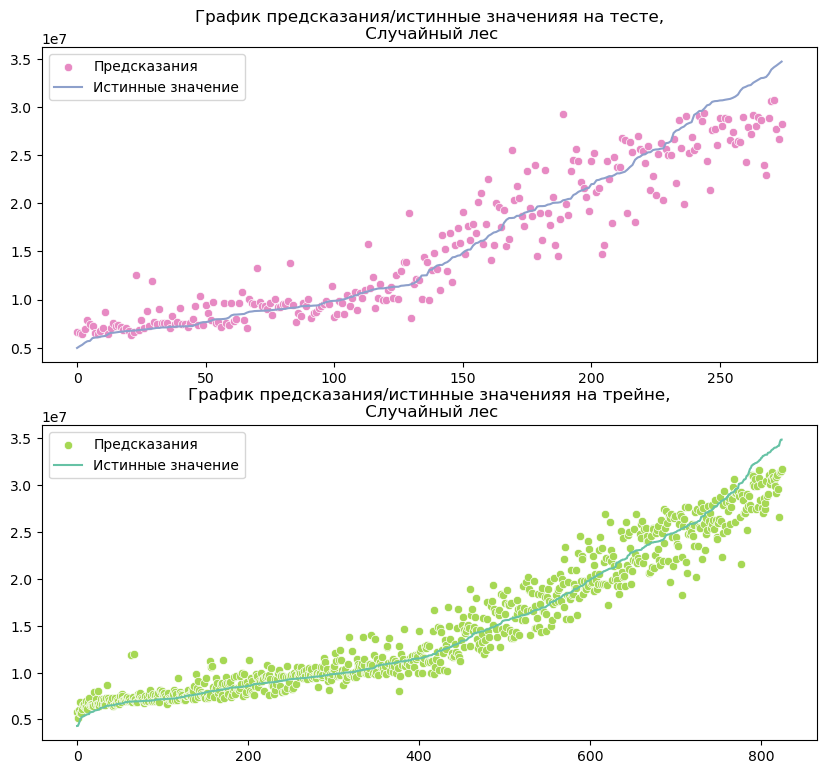

In [28]:
colors = sns.color_palette('Set2', )

plt.figure(figsize = (10,9))

plt.subplot(2,1,1)
plt.title('График предсказания/истинные значенияя на тесте,\n Случайный лес')
sns.scatterplot(x = range(len(y_pred)), y = y_pred[sort_mask_test], color = colors[3], label = 'Предсказания')
sns.lineplot(x = range(len(y_test)), y = y_test.to_numpy()[sort_mask_test], color = colors[2], label = 'Истинные значение')

plt.subplot(2,1,2)
plt.title('График предсказания/истинные значенияя на трейне,\n Случайный лес')
sns.scatterplot(x = range(len(y_train_pred)), y = y_train_pred[sort_mask_train], color = colors[4], label = 'Предсказания')
sns.lineplot(x = range(len(y_train)), y = y_train.to_numpy()[sort_mask_train], color = colors[0], label = 'Истинные значение')

plt.legend()
plt.show()

## `Градиентный бустинг`

In [29]:
from sklearn.ensemble import GradientBoostingRegressor


parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

searcher_gb = GridSearchCV(GradientBoostingRegressor(),parameters ,
                        scoring = 'neg_root_mean_squared_error', cv=5, n_jobs=-1, verbose =10)
searcher_gb.fit(X_train_norm, y_train)

best_n = searcher_gb.best_params_['n_estimators']
best_depth = searcher_gb.best_params_['max_depth']
best_rate = searcher_gb.best_params_['learning_rate']

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5; 146/352] START max_depth=4, min_samples_leaf=6, n_estimators=75........
[CV 1/5; 146/352] END max_depth=4, min_samples_leaf=6, n_estimators=75;, score=-3714505.888 total time=   0.4s
[CV 4/5; 147/352] START max_depth=4, min_samples_leaf=6, n_estimators=80........
[CV 4/5; 147/352] END max_depth=4, min_samples_leaf=6, n_estimators=80;, score=-3070123.157 total time=   0.5s
[CV 2/5; 149/352] START max_depth=4, min_samples_leaf=6, n_estimators=90........
[CV 2/5; 149/352] END max_depth=4, min_samples_leaf=6, n_estimators=90;, score=-3605935.812 total time=   0.5s
[CV 5/5; 150/352] START max_depth=4, min_samples_leaf=6, n_estimators=95........
[CV 5/5; 150/352] END max_depth=4, min_samples_leaf=6, n_estimators=95;, score=-3874345.227 total time=   0.6s
[CV 3/5; 152/352] START max_depth=4, min_samples_leaf=6, n_estimators=105.......
[CV 3/5; 152/352] END max_depth=4, min_samples_leaf=6, n_estimators=105;, score=-3391752

[CV 4/5; 135/352] START max_depth=4, min_samples_leaf=6, n_estimators=20........
[CV 4/5; 135/352] END max_depth=4, min_samples_leaf=6, n_estimators=20;, score=-3112146.278 total time=   0.1s
[CV 5/5; 136/352] START max_depth=4, min_samples_leaf=6, n_estimators=25........
[CV 5/5; 136/352] END max_depth=4, min_samples_leaf=6, n_estimators=25;, score=-3911763.285 total time=   0.1s
[CV 2/5; 138/352] START max_depth=4, min_samples_leaf=6, n_estimators=35........
[CV 2/5; 138/352] END max_depth=4, min_samples_leaf=6, n_estimators=35;, score=-3577294.665 total time=   0.2s
[CV 5/5; 139/352] START max_depth=4, min_samples_leaf=6, n_estimators=40........
[CV 5/5; 139/352] END max_depth=4, min_samples_leaf=6, n_estimators=40;, score=-3920733.055 total time=   0.2s
[CV 3/5; 141/352] START max_depth=4, min_samples_leaf=6, n_estimators=50........
[CV 3/5; 141/352] END max_depth=4, min_samples_leaf=6, n_estimators=50;, score=-3419976.372 total time=   0.3s
[CV 1/5; 143/352] START max_depth=4, min

[CV 2/5; 159/352] START max_depth=4, min_samples_leaf=8, n_estimators=30........
[CV 2/5; 159/352] END max_depth=4, min_samples_leaf=8, n_estimators=30;, score=-3626413.286 total time=   0.2s
[CV 5/5; 160/352] START max_depth=4, min_samples_leaf=8, n_estimators=35........
[CV 5/5; 160/352] END max_depth=4, min_samples_leaf=8, n_estimators=35;, score=-4001916.116 total time=   0.2s
[CV 3/5; 162/352] START max_depth=4, min_samples_leaf=8, n_estimators=45........
[CV 3/5; 162/352] END max_depth=4, min_samples_leaf=8, n_estimators=45;, score=-3455153.070 total time=   0.3s
[CV 1/5; 164/352] START max_depth=4, min_samples_leaf=8, n_estimators=55........
[CV 1/5; 164/352] END max_depth=4, min_samples_leaf=8, n_estimators=55;, score=-3783956.398 total time=   0.3s
[CV 4/5; 165/352] START max_depth=4, min_samples_leaf=8, n_estimators=60........
[CV 4/5; 165/352] END max_depth=4, min_samples_leaf=8, n_estimators=60;, score=-3122290.606 total time=   0.4s
[CV 2/5; 167/352] START max_depth=4, min

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(s

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(s

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight

  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_

  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(s

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(s

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/User

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(s

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


[CV 5/5; 246/352] START max_depth=6, min_samples_leaf=8, n_estimators=25........
[CV 5/5; 246/352] END max_depth=6, min_samples_leaf=8, n_estimators=25;, score=-3602218.343 total time=   0.1s
[CV 3/5; 248/352] START max_depth=6, min_samples_leaf=8, n_estimators=35........
[CV 3/5; 248/352] END max_depth=6, min_samples_leaf=8, n_estimators=35;, score=-3376360.189 total time=   0.2s
[CV 5/5; 249/352] START max_depth=6, min_samples_leaf=8, n_estimators=40........
[CV 5/5; 249/352] END max_depth=6, min_samples_leaf=8, n_estimators=40;, score=-3688159.524 total time=   0.2s
[CV 3/5; 251/352] START max_depth=6, min_samples_leaf=8, n_estimators=50........
[CV 3/5; 251/352] END max_depth=6, min_samples_leaf=8, n_estimators=50;, score=-3388103.004 total time=   0.2s
[CV 1/5; 253/352] START max_depth=6, min_samples_leaf=8, n_estimators=60........
[CV 1/5; 253/352] END max_depth=6, min_samples_leaf=8, n_estimators=60;, score=-3668376.218 total time=   0.2s
[CV 4/5; 254/352] START max_depth=6, min

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


s_leaf=8, n_estimators=20........
[CV 2/5; 333/352] END max_depth=8, min_samples_leaf=8, n_estimators=20;, score=-3478231.507 total time=   0.1s
[CV 1/5; 334/352] START max_depth=8, min_samples_leaf=8, n_estimators=25........
[CV 1/5; 334/352] END max_depth=8, min_samples_leaf=8, n_estimators=25;, score=-3635404.706 total time=   0.1s
[CV 3/5; 335/352] START max_depth=8, min_samples_leaf=8, n_estimators=30........
[CV 3/5; 335/352] END max_depth=8, min_samples_leaf=8, n_estimators=30;, score=-3318916.045 total time=   0.1s
[CV 5/5; 336/352] START max_depth=8, min_samples_leaf=8, n_estimators=35........
[CV 5/5; 336/352] END max_depth=8, min_samples_leaf=8, n_estimators=35;, score=-3625950.539 total time=   0.1s
[CV 3/5; 338/352] START max_depth=8, min_samples_leaf=8, n_estimators=45........
[CV 3/5; 338/352] END max_depth=8, min_samples_leaf=8, n_estimators=45;, score=-3378158.252 total time=   0.2s
[CV 1/5; 340/352] START max_depth=8, min_samples_leaf=8, n_estimators=55........
[CV 1/

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.red

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/User

  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_

[CV 2/5; 245/352] START max_depth=6, min_samples_leaf=8, n_estimators=20........
[CV 2/5; 245/352] END max_depth=6, min_samples_leaf=8, n_estimators=20;, score=-3520815.791 total time=   0.1s
[CV 3/5; 246/352] START max_depth=6, min_samples_leaf=8, n_estimators=25........
[CV 3/5; 246/352] END max_depth=6, min_samples_leaf=8, n_estimators=25;, score=-3347170.541 total time=   0.1s
[CV 5/5; 247/352] START max_depth=6, min_samples_leaf=8, n_estimators=30........
[CV 5/5; 247/352] END max_depth=6, min_samples_leaf=8, n_estimators=30;, score=-3691073.016 total time=   0.2s
[CV 3/5; 249/352] START max_depth=6, min_samples_leaf=8, n_estimators=40........
[CV 3/5; 249/352] END max_depth=6, min_samples_leaf=8, n_estimators=40;, score=-3420538.394 total time=   0.2s
[CV 1/5; 251/352] START max_depth=6, min_samples_leaf=8, n_estimators=50........
[CV 1/5; 251/352] END max_depth=6, min_samples_leaf=8, n_estimators=50;, score=-3717330.376 total time=   0.2s
[CV 4/5; 252/352] START max_depth=6, min

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


_samples_leaf=8, n_estimators=55........
[CV 4/5; 252/352] END max_depth=6, min_samples_leaf=8, n_estimators=55;, score=-2912672.229 total time=   0.2s
[CV 1/5; 254/352] START max_depth=6, min_samples_leaf=8, n_estimators=65........
[CV 1/5; 254/352] END max_depth=6, min_samples_leaf=8, n_estimators=65;, score=-3679106.380 total time=   0.2s
[CV 4/5; 255/352] START max_depth=6, min_samples_leaf=8, n_estimators=70........
[CV 4/5; 255/352] END max_depth=6, min_samples_leaf=8, n_estimators=70;, score=-2920783.988 total time=   0.3s
[CV 1/5; 257/352] START max_depth=6, min_samples_leaf=8, n_estimators=80........
[CV 1/5; 257/352] END max_depth=6, min_samples_leaf=8, n_estimators=80;, score=-3625406.713 total time=   0.3s
[CV 4/5; 258/352] START max_depth=6, min_samples_leaf=8, n_estimators=85........
[CV 4/5; 258/352] END max_depth=6, min_samples_leaf=8, n_estimators=85;, score=-2971164.489 total time=   0.3s
[CV 2/5; 260/352] START max_depth=6, min_samples_leaf=8, n_estimators=95........

nda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users

 3/5; 298/352] END max_depth=8, min_samples_leaf=4, n_estimators=65;, score=-2909060.450 total time=   0.3s
[CV 1/5; 300/352] START max_depth=8, min_samples_leaf=4, n_estimators=75........
[CV 1/5; 300/352] END max_depth=8, min_samples_leaf=4, n_estimators=75;, score=-3364350.263 total time=   0.3s
[CV 4/5; 301/352] START max_depth=8, min_samples_leaf=4, n_estimators=80........
[CV 4/5; 301/352] END max_depth=8, min_samples_leaf=4, n_estimators=80;, score=-2824612.984 total time=   0.4s
[CV 2/5; 303/352] START max_depth=8, min_samples_leaf=4, n_estimators=90........
[CV 2/5; 303/352] END max_depth=8, min_samples_leaf=4, n_estimators=90;, score=-3295373.690 total time=   0.4s
[CV 5/5; 304/352] START max_depth=8, min_samples_leaf=4, n_estimators=95........
[CV 5/5; 304/352] END max_depth=8, min_samples_leaf=4, n_estimators=95;, score=-3346711.576 total time=   0.4s
[CV 3/5; 306/352] START max_depth=8, min_samples_leaf=4, n_estimators=105.......
[CV 3/5; 306/352] END max_depth=8, min_samp

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(s

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(s

/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/Users/polinadmitrieva/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square


In [30]:
gb = GradientBoostingRegressor(
        n_estimators=best_n,
        max_depth=best_depth,
    ).fit(X_train_norm, y_train)

y_pred = gb.predict(X_test_norm)
y_train_pred = gb.predict(X_train_norm)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))
print("Train R_2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R_2 = %.4f" % r2_score(y_test, y_pred))

Test MSE = 5084502851204.1221
Train MSE = 634507405617.8896
Train R_2 = 0.9899
Test R_2 = 0.9319


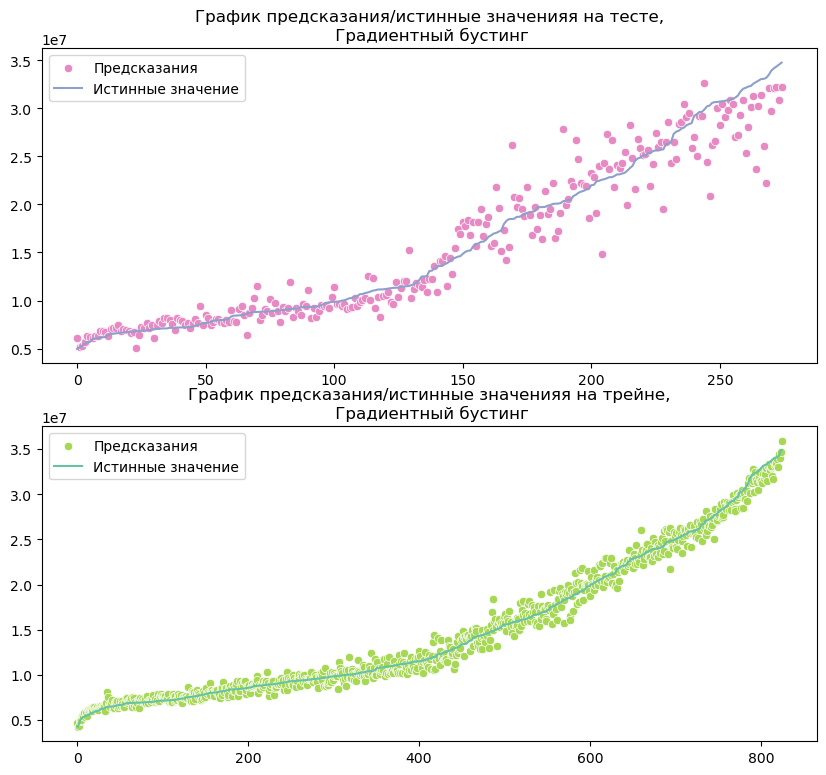

In [32]:
colors = sns.color_palette('Set2', )

plt.figure(figsize = (10,9))

plt.subplot(2,1,1)
plt.title('График предсказания/истинные значенияя на тесте,\n Градиентный бустинг')
sns.scatterplot(x = range(len(y_pred)), y = y_pred[sort_mask_test], color = colors[3], label = 'Предсказания')
sns.lineplot(x = range(len(y_test)), y = y_test.to_numpy()[sort_mask_test], color = colors[2], label = 'Истинные значение')

plt.subplot(2,1,2)
plt.title('График предсказания/истинные значенияя на трейне,\n Градиентный бустинг')
sns.scatterplot(x = range(len(y_train_pred)), y = y_train_pred[sort_mask_train], color = colors[4], label = 'Предсказания')
sns.lineplot(x = range(len(y_train)), y = y_train.to_numpy()[sort_mask_train], color = colors[0], label = 'Истинные значение')

plt.legend()
plt.show()

##  `XGBoost`

In [46]:
import xgboost as xgb
params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05],
    'min_child_weight': range(1, 6, 2)
}


searcher_gbx = GridSearchCV(xgb.XGBRegressor(),params,
                        scoring = 'neg_root_mean_squared_error', cv=5, n_jobs=-1, verbose =10)
searcher_gbx.fit(X_train_norm, y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators': range(60, 220, 40)},
             scoring='neg_root_mean_squared_error', verbose=10)

In [49]:
best_lr = searcher_gbx.best_params_['learning_rate']
best_depth = searcher_gbx.best_params_['max_depth']
best_n = searcher_gbx.best_params_['n_estimators']
best_child = searcher_gbx.best_params_['min_child_weight']

1

[CV 3/5; 1/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=60
[CV 3/5; 1/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=60;, score=-2764165.080 total time=   0.2s
[CV 3/5; 3/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=140
[CV 3/5; 3/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=140;, score=-2271689.149 total time=   0.5s
[CV 1/5; 5/288] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=60
[CV 1/5; 5/288] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=60;, score=-3241523.078 total time=   0.2s
[CV 4/5; 5/288] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=60
[CV 4/5; 5/288] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=60;, score=-2703749.489 total time=   0.2s
[CV 5/5; 6/288] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=100
[CV 5/5; 6/288] END learning_rate=0

[CV 3/5; 2/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100
[CV 3/5; 2/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100;, score=-2469942.241 total time=   0.4s
[CV 1/5; 4/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=180
[CV 1/5; 4/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=180;, score=-2712139.692 total time=   0.6s
[CV 5/5; 5/288] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=60
[CV 5/5; 5/288] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=60;, score=-3374428.990 total time=   0.2s
[CV 1/5; 7/288] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=140
[CV 1/5; 7/288] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=140;, score=-2810677.173 total time=   0.5s
[CV 4/5; 8/288] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=180
[CV 4/5; 8/288] END learning_ra

[CV 1/5; 1/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=60
[CV 1/5; 1/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=60;, score=-3217531.802 total time=   0.2s
[CV 1/5; 3/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=140
[CV 1/5; 3/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=140;, score=-2810088.733 total time=   0.5s
[CV 4/5; 4/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=180
[CV 4/5; 4/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=180;, score=-2206310.298 total time=   0.6s
[CV 3/5; 7/288] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=140
[CV 3/5; 7/288] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=140;, score=-2261264.950 total time=   0.5s
[CV 1/5; 9/288] START learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=60
[CV 1/5; 9/288] END learning_rat

[CV 1/5; 2/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100
[CV 1/5; 2/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100;, score=-2947475.036 total time=   0.4s
[CV 5/5; 3/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=140
[CV 5/5; 3/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=140;, score=-2921998.829 total time=   0.5s
[CV 2/5; 5/288] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=60
[CV 2/5; 5/288] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=60;, score=-2877230.105 total time=   0.2s
[CV 2/5; 6/288] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=100
[CV 2/5; 6/288] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=100;, score=-2685690.309 total time=   0.4s
[CV 5/5; 7/288] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=140
[CV 5/5; 7/288] END learning_ra

[CV 2/5; 1/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=60
[CV 2/5; 1/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=60;, score=-2865942.328 total time=   0.2s
[CV 5/5; 2/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100
[CV 5/5; 2/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100;, score=-3097463.621 total time=   0.4s
[CV 2/5; 4/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=180
[CV 2/5; 4/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=180;, score=-2430363.879 total time=   0.6s
[CV 3/5; 6/288] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=100
[CV 3/5; 6/288] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=100;, score=-2426856.768 total time=   0.4s
[CV 1/5; 8/288] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=180
[CV 1/5; 8/288] END learning_ra

[CV 5/5; 1/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=60
[CV 5/5; 1/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=60;, score=-3397376.232 total time=   0.2s
[CV 4/5; 2/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100
[CV 4/5; 2/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100;, score=-2448034.725 total time=   0.4s
[CV 3/5; 4/288] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=180
[CV 3/5; 4/288] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=180;, score=-2177486.198 total time=   0.6s
[CV 4/5; 6/288] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=100
[CV 4/5; 6/288] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=100;, score=-2455520.178 total time=   0.4s
[CV 2/5; 8/288] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=180
[CV 2/5; 8/288] END learning_ra

In [48]:
gbx = xgb.XGBRegressor(n_estimators = best_n, max_depth = best_depth,
                       learning_rate =  best_lr,min_child_weight = best_child ).fit(X_train_norm, y_train)

y_pred = gbx.predict(X_test_norm)
y_train_pred = gbx.predict(X_train_norm)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))
print("Train R_2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R_2 = %.4f" % r2_score(y_test, y_pred))

Test MSE = 5826429904917.1885
Train MSE = 2230619632073.9980
Train R_2 = 0.9645
Test R_2 = 0.9220


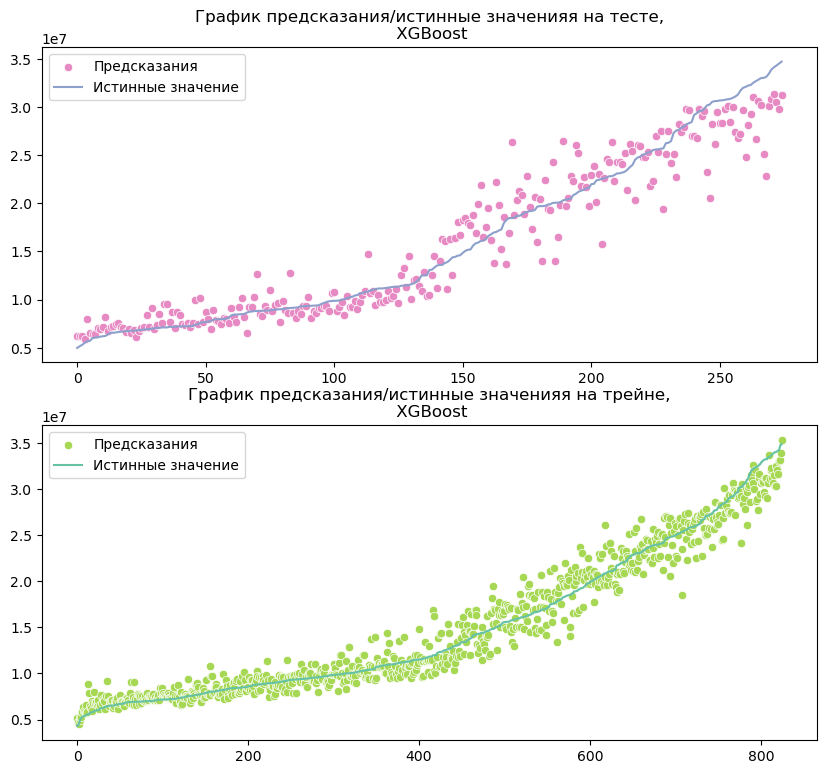

In [50]:
colors = sns.color_palette('Set2', )

plt.figure(figsize = (10,9))

plt.subplot(2,1,1)
plt.title('График предсказания/истинные значенияя на тесте,\n XGBoost')
sns.scatterplot(x = range(len(y_pred)), y = y_pred[sort_mask_test], color = colors[3], label = 'Предсказания')
sns.lineplot(x = range(len(y_test)), y = y_test.to_numpy()[sort_mask_test], color = colors[2], label = 'Истинные значение')

plt.subplot(2,1,2)
plt.title('График предсказания/истинные значенияя на трейне,\n XGBoost')
sns.scatterplot(x = range(len(y_train_pred)), y = y_train_pred[sort_mask_train], color = colors[4], label = 'Предсказания')
sns.lineplot(x = range(len(y_train)), y = y_train.to_numpy()[sort_mask_train], color = colors[0], label = 'Истинные значение')

plt.legend()
plt.show()